# Outlier and K-NN

**Outlier** adalah data yang memiliki nilai yang jauh berbeda dari sebagian besar data lainnya dalam sebuah dataset, yang dapat disebabkan oleh kesalahan pengukuran, variasi alami, atau faktor eksternal lainnya. Identifikasi outlier penting dalam analisis data karena dapat memengaruhi hasil _pemodelan_ dan _pengambilan keputusan_. Sementara itu, **K-Nearest Neighbors (KNN)** adalah algoritma pembelajaran mesin berbasis instance yang digunakan untuk klasifikasi dan regresi dengan menentukan kelas atau nilai suatu data berdasarkan mayoritas dari k tetangga terdekatnya. KNN sangat bergantung pada metrik jarak, seperti **Euclidean Distance**.

## Outlier Detection

Outlier adalah titik data yang berbeda secara signifikan dari sebagian besar data. Faktor penyebab:

- **Data entry errors**: Nilai yang dicatat salah.
- **Measurement errors**: Sensor atau instrumen rusak.
- **Natural variability**: Pengamatan yang ekstrim namun valid (pendapatan seorang miliarder dalam kumpulan data pendapatan rata-rata).


***Why is it Important?***

- Outliers dapat mendistorsi analisis statistik (mean, deviasi standar).
- Hal ini dapat berdampak negatif terhadap performa model pembelajaran mesin.
- Dalam beberapa kasus, outlier mungkin mewakili informasi penting (deteksi penipuan).

### Methods for Outlier Detection

1. **Statistical Methods**:
   - _Z-Score_: Mengukur berapa banyak standar deviasi suatu titik data dari mean. Titik data dengan skor Z lebih besar dari 3 atau kurang dari -3 sering kali dianggap outlier.
   - _IQR (Interquartile Range)_: Mengidentifikasi outlier sebagai titik data di bawah Q1 - 1,5IQR atau di atas Q3 + 1,5IQR, dengan Q1 dan Q3 masing-masing adalah kuartil pertama dan ketiga.
2. **Visual Methods**:
   - _Box Plots_: Representasi grafis dari distribusi data (ditampilkan sebagai titik di luar "whiskers").
   - _Scatter Plots_: Berguna untuk mengidentifikasi outlier dalam data bivariat (dua variabel).
3. **Machine Learning Methods**:
   - _Clustering_: Outliers mungkin muncul sebagai titik data yang bukan milik cluster mana pun.
   - _Isolation Forest_: Algoritm dirancang khusus agar mendeteksi outlier dengan mengisolasi titik data.
   - _DBSCAN (Density-Based Spatial Clustering of Applications with Noise)_: Mengidentifikasi outlier sebagai titik di wilayah dengan kepadatan rendah.
   - **KNN (K-Nearest Neighbors)**: Menggunakan jarak ke tetangga terdekat untuk mengidentifikasi outlier.
4. **Domain-Specific Methods**:
   - Gunakan pengetahuan domain untuk mengidentifikasi outlier. Misalnya, dalam layanan kesehatan, usia pasien 150 tahun merupakan hal yang berbeda.

### Handling Outliers

Setelah outlier terdeteksi, Anda perlu memutuskan cara menanganinya:

- **Remove**: Jika outlier disebabkan oleh kesalahan atau **noise**.
- **Transform**: Menerapkan transformasi (transformasi log) untuk mengurangi dampak outlier.
- **Cap/Floor**: Ganti outlier dengan nilai ambang batas maksimum atau minimum.
- **Keep**: Jika outlier tersebut valid dan bermakna (kasus penipuan).

***Summary of Outlier Detection***
- Outlier adalah titik data yang menyimpang secara signifikan dari data lainnya.
- Mendeteksi dan menangani outlier sangat penting untuk memastikan kualitas data.
- Metode untuk mendeteksi outlier mencakup teknik statistik (Z-score, IQR), metode visual (box plots, scatter plots), dan algoritma pembelajaran mesin (Isolation Forest, DBSCAN).
- Outlier dievaluasi secara hati-hati untuk menentukan apakah itu kesalahan atau pengamatan yang bermakna.

## K-Nearest Neighbors (KNN)

```python
from sklearn.neighbors import NearestNeighbors
```

KNN mengidentifikasi outlier dengan menghitung jarak suatu titik ke K tetangga terdekatnya. Titik dengan rata-rata/total jarak signifikan lebih besar dianggap outlier, karena berada di area kepadatan rendah.

Parameter Krusial:
1. Nilai K:
      - K terlalu kecil: Rentan noise (false positive).
      - K terlalu besar: Risiko melewatkan outlier (false negative).
2. Metrik Jarak: _Euclidean_ (skala seragam) atau _Manhattan_ (robust terhadap outlier).
3. Normalisasi: Wajib untuk data berskala berbeda (e.g., Z-score).

Perkembangan KNN:
   * _Local Outlier Factor (LOF)_: Memperhitungkan kepadatan lokal, lebih akurat untuk anomali kompleks.
   * Kelebihan: Sederhana, intuitif, dan efektif untuk identifikasi data tidak konsisten.

### How KNN Works?

1. **Step 1: Choose a Value for K**
   - Pilih jumlah tetangga (K) yang akan dipertimbangkan. Misalnya, K=3 berarti algoritma akan melihat 3 tetangga terdekat untuk setiap titik data.
2. **Step 2: Calculate Distances**
   - Hitung jarak (**Euclidean distance**, Manhattan distance, dan Minkowski distance) antara setiap titik data dan K tetangga terdekatnya.
3. **Step 3: Identify Outliers**
   - Titik data dengan jarak yang lebih jauh ke tetangganya dianggap outlier. Misalnya, jika jarak rata-rata ke K tetangga terdekat jauh lebih besar dibandingkan sebagian besar data, maka titik tersebut ditandai sebagai outlier.

### What is Euclidean Distance?

Euclidean distance adalah salah satu metrik jarak yang paling umum digunakan dalam ilmu data dan pembelajaran mesin. Ini mengukur jarak garis lurus antara dua titik dalam ruang multidimensi. Ini berasal dari teorema Pythagoras dan digunakan secara luas karena kesederhanaan dan interpretasi intuitifnya.

***Euclidean Distance Formula***
Untuk dua titik $ x = (x_1, x_2, \dots, x_n) $ dan $ y = (y_1, y_2, \dots, y_n) $ dalam ruang $ n $-dimensi:

$$
d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

***Sample Case***
Misalkan ada dua titik dalam ruang 2D:
- Titik A: $ (1, 2) $
- Titik B: $ (4, 6) $

1. Hitung selisih tiap komponen:

$$
\begin{align*}
x_2 - x_1 &= 4 - 1 = 3 \\
y_2 - y_1 &= 6 - 2 = 4 \\
\end{align*}
$$

2. Kuadratkan selisih:

$$
\begin{align*}
(3)^2 &= 9 \\
(4)^2 &= 16 \\
\end{align*}
$$

3. Jumlahkan hasil kuadrat:

$$
9 + 16 = 25
$$

4. Akar kuadratkan hasil penjumlahan:

$$
d(A, B) = \sqrt{25} = 3
$$

**Hasil**: Jarak Euclidean antara A dan B adalah **5 unit**.

### Why do we use KNN?

KNN (K-Nearest Neighbors) digunakan untuk mendeteksi outlier karena kemampuannya mengukur tingkat isolasi suatu titik data berdasarkan kedekatannya dengan tetangga terdekat dalam ruang fitur. Prinsip dasarnya adalah: data normal cenderung berada di wilayah dengan kepadatan tinggi, sedangkan outlier terletak jauh dari kelompok data mayoritas. Dengan menghitung rata-rata jarak suatu titik ke K tetangga terdekatnya, KNN memberikan anomaly score yang mencerminkan seberapa "tidak biasa" titik tersebut. Misalnya, jika suatu titik memiliki jarak rata-rata ke 5 tetangga terdekat yang 10 kali lebih besar dari titik lain, kemungkinan besar itu adalah outlier. Kelebihan KNN adalah sederhana secara konseptual, tidak memerlukan asumsi distribusi data, dan efektif untuk data multidimensi. Namun, pemilihan nilai K yang tepat krusial nilai terlalu kecil membuat deteksi rentan noise, sementara nilai terlalu besar berisiko mengabaikan outlier yang halus.

### Why should Euclidean Distance?

Euclidean distance dipilih karena memberikan interpretasi geometris yang intuitif sebagai jarak garis lurus antara dua titik dalam ruang multidimensi, yang sesuai dengan cara manusia mempersepsikan jarak dalam dunia fisik. Metrik ini menghitung akar kuadrat dari jumlah kuadrat selisih tiap komponen fitur, sehingga secara matematis mudah diimplementasikan dan efisien untuk data dengan skala seragam. Contohnya, pada dataset pengukuran fisik (sepanjang, lebar, tinggi), Euclidean distance secara alami mencerminkan perbedaan ukuran sebenarnya. Namun, kelemahannya adalah sensitivitas terhadap skala fitur-fitur dengan rentang nilai besar (misal: pendapatan dalam jutaan) akan mendominasi perhitungan. Oleh karena itu, normalisasi data (seperti Z-score) wajib dilakukan sebelum menggunakan Euclidean distance. Meskipun ada metrik lain seperti Manhattan atau Mahalanobis, Euclidean tetap populer karena kesederhanaan dan kinerjanya yang baik pada data rendah dimensi.

## MinMaxScaler

```python
from sklearn.preprocessing import MinMaxScaler
```

`MinMaxScaler` adalah alat dalam pustaka Scikit-learn yang digunakan untuk menormalkan data numerik sehingga nilai-nilai dalam setiap fitur (kolom) berada dalam rentang tertentu, secara default antara 0 dan 1. Normalisasi ini penting untuk algoritma pembelajaran mesin yang sensitif terhadap skala data, seperti K-Nearest Neighbors (KNN), karena memastikan bahwa semua fitur memiliki kontribusi yang seimbang dalam perhitungan, misalnya, saat menghitung jarak antar titik data.

Tujuan utama `MinMaxScaler` adalah:
- Mengubah data ke rentang yang ditentukan (misalnya, [0, 1]).
- Menghilangkan perbedaan skala antar fitur, sehingga fitur dengan rentang besar (misalnya, 0-1000) tidak mendominasi fitur dengan rentang kecil (misalnya, 0-1).
- Menjaga hubungan relatif antar nilai dalam fitur, tanpa mengasumsikan distribusi data tertentu (seperti distribusi normal).

### MinMaxScaler Formula

**Kasus Default**:
Jika rentang tujuan adalah [0, 1] (pengaturan default), rumus disederhanakan menjadi:

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Rumus ini memetakan:
- $X_{\text{min}}$ ke 0.
- $X_{\text{max}}$ ke 1.
- Nilai di antara $X_{\text{min}}$ dan $X_{\text{max}}$ ke nilai antara 0 dan 1 secara linier.

---

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \cdot (fr_{\max} - fr_{\min}) + fr_{\min}
$$

**Penjelasan komponen rumus**:
- $X$: Nilai asli dari fitur untuk suatu titik data.
- $X_{\text{min}}$: Nilai minimum dari fitur tersebut di seluruh dataset.
- $X_{\text{max}}$: Nilai maksimum dari fitur tersebut di seluruh dataset.
- $fr_{\min}$: Batas bawah rentang tujuan (default: 0).
- $fr_{\max}$: Batas atas rentang tujuan (default: 1).
- $X_{\text{scaled}}$: Nilai yang telah dinormalkan ke rentang tujuan.

**Catatan**: $fr_{\min}$ dan $fr_{\max}$ merupakan notasi singkat untuk `feature_range_min` dan `feature_range_max`.

---

**Contoh Manual**:
Misalkan fitur memiliki nilai [10, 20, 30, 40], dengan $X_{\text{min}} = 10$ dan $X_{\text{max}} = 40$. Untuk nilai $X = 20$:

$$
X_{\text{scaled}} = \frac{20 - 10}{40 - 10} = \frac{10}{30} \approx 0.333
$$

Jadi, nilai 20 menjadi sekitar 0.333 dalam skala [0, 1].

### How MinMaxScaler Works?

1. **Menghitung Parameter (Fit)**:
   - Scaler menganalisis data untuk menemukan nilai minimum ($X_{\text{min}}$) dan maksimum ($X_{\text{max}}$) dari setiap fitur.
   - Informasi ini disimpan untuk digunakan dalam transformasi.
2. **Menskalakan Data (Transform)**:
   - Menggunakan $X_{\text{min}}$ dan $X_{\text{max}}$ yang telah dihitung, setiap nilai dalam fitur diubah ke rentang tujuan (misalnya, [0, 1]) dengan rumus di atas.
3. **Mengembalikan Skala Asli (Inverse Transform)**:
   - Scaler dapat mengembalikan data yang telah dinormalkan ke skala aslinya, berguna untuk interpretasi hasil.
4. **Pembaruan Bertahap (Partial Fit)**:
   - Scaler dapat memperbarui $X_{\text{min}}$ dan $X_{\text{max}}$ secara bertahap jika data baru ditambahkan, cocok untuk data streaming.

**Catatan Penting**:
- Parameter $X_{\text{min}}$ dan $X_{\text{max}}$ dihitung dari data pelatihan (training data) untuk menghindari kebocoran data (data leakage).
- Data uji (test data) hanya ditransformasi menggunakan parameter yang sama dari data pelatihan, tanpa menghitung ulang $X_{\text{min}}$ dan $X_{\text{max}}$.

### MinMaxScaler Parameters

`MinMaxScaler` memiliki beberapa parameter yang dapat disesuaikan saat membuat instance:
- **feature_range**: Tuple berisi dua nilai `(min, max)` yang menentukan rentang tujuan untuk data yang dinormalkan.
  - Default: `(0, 1)`, artinya data diskalakan ke [0, 1].
  - Contoh: Jika `feature_range=(-1, 1)`, data diskalakan ke [-1, 1].
- **copy**: Nilai boolean yang menentukan apakah data asli akan disalin sebelum transformasi.
  - Default: `True`, artinya salinan dibuat untuk mencegah modifikasi data asli.
  - Jika `False`, transformasi dilakukan langsung pada data asli untuk menghemat memori (jarang digunakan).
- **clip**: Nilai boolean yang menentukan apakah nilai di luar rentang $X_{\text{min}}$ dan $X_{\text{max}}$ akan dipotong ke batas rentang tujuan saat transformasi.
  - Default: `False`, artinya nilai di luar rentang tetap dihitung sesuai rumus (bisa menghasilkan nilai di luar `feature_range`).
  - Jika `True`, nilai lebih kecil dari $X_{\text{min}}$ menjadi `feature_range_min`, dan nilai lebih besar dari $X_{\text{max}}$ menjadi `feature_range_max`.
  - Fitur ini diperkenalkan di Scikit-learn versi 1.1.

**Contoh Penggunaan Parameter**:
- Jika `feature_range=(-1, 1)`, nilai $X_{\text{min}}$ dipetakan ke -1, dan $X_{\text{max}}$ ke 1.
- Jika `clip=True` dan data baru memiliki nilai di luar $X_{\text{min}}$ atau $X_{\text{max}}$, nilai tersebut akan dipaksa masuk ke rentang tujuan.

### MinMaxScaler Attribute

Setelah scaler di-fit ke data, beberapa atribut tersedia untuk memberikan informasi tentang proses normalisasi:

- **min_**: Nilai minimum per fitur setelah penskalaan, dihitung sebagai offset untuk transformasi.  
  - Rumus:  
    $$
    \text{min\_} = -\frac{X_{\text{min}} \cdot (fr_{\max} - fr_{\min})}{X_{\text{max}} - X_{\text{min}}} + fr_{\min}
    $$

- **scale_**: Faktor skala per fitur, yang menunjukkan seberapa besar data asli diskalakan.  
  - Rumus:  
    $$
    \text{scale\_} = \frac{fr_{\max} - fr_{\min}}{X_{\text{max}} - X_{\text{min}}}
    $$

- **data_min_**: Nilai minimum asli per fitur ($X_{\text{min}}$).  
- **data_max_**: Nilai maksimum asli per fitur ($X_{\text{max}}$).  
- **data_range_**: Rentang asli per fitur ($X_{\text{max}} - X_{\text{min}}$).  
- **n_features_in_**: Jumlah fitur yang ditemukan dalam data saat proses *fit*.  
- **feature_names_in_**: Nama fitur jika data input berupa DataFrame (hanya tersedia jika input adalah DataFrame).

Atribut ini berguna untuk memeriksa bagaimana scaler telah menyesuaikan diri dengan data, misalnya, untuk memverifikasi rentang asli fitur atau faktor skala yang digunakan.

### MinMaxScaler Operational Process

1. **Fit**: Scaler mempelajari $X_{\text{min}}$ dan $X_{\text{max}}$ dari data yang diberikan untuk setiap fitur.
2. **Transform**: Scaler menerapkan rumus normalisasi untuk mengubah data ke rentang tujuan.
3. **Fit-Transform**: Kombinasi fit dan transform dalam satu langkah, sering digunakan untuk data pelatihan.
4. **Inverse Transform**: Mengembalikan data yang telah dinormalkan ke skala aslinya menggunakan parameter yang tersimpan.
5. **Partial Fit**: Memperbarui $X_{\text{min}}$ dan $X_{\text{max}}$ secara bertahap untuk data baru, berguna dalam skenario data streaming.

**Contoh Alur Kerja**:
- Dataset memiliki fitur "usia" dengan nilai [20, 30, 40, 50].
- Saat fit, scaler menemukan $X_{\text{min}} = 20$ dan $X_{\text{max}} = 50$.
- Saat transform, nilai 30 menjadi:
  $$
  X_{\text{scaled}} = \frac{30 - 20}{50 - 20} = \frac{10}{30} \approx 0.333
  $$
- Saat inverse transform, nilai 0.333 dikembalikan ke:
  $$
  X = 0.333 \cdot (50 - 20) + 20 = 10 + 20 = 30
  $$


### MinMaxScaler Sample Case

#### Dataset

| Usia | Gaji   | Skor Tes |
|------|--------|----------|
| 20   | 20000  | 50       |
| 30   | 40000  | 60       |
| 40   | 60000  | 70       |
| 50   | 100000 | 80       |

#### Langkah 1: Menghitung Parameter
- Untuk fitur **Usia**: $X_{\text{min}} = 20$, $X_{\text{max}} = 50$, rentang = $50 - 20 = 30$.
- Untuk fitur **Gaji**: $X_{\text{min}} = 20000$, $X_{\text{max}} = 100000$, rentang = $100000 - 20000 = 80000$.
- Untuk fitur **Skor Tes**: $X_{\text{min}} = 50$, $X_{\text{max}} = 80$, rentang = $80 - 50 = 30$.

#### Langkah 2: Normalisasi ke [0, 1]
Menggunakan rumus default:
- **Usia** (misalnya, nilai 30):
  $$
  X_{\text{scaled}} = \frac{30 - 20}{50 - 20} = \frac{10}{30} \approx 0.333
  $$
- **Gaji** (misalnya, nilai 40000):
  $$
  X_{\text{scaled}} = \frac{40000 - 20000}{100000 - 20000} = \frac{20000}{80000} = 0.25
  $$
- **Skor Tes** (misalnya, nilai 60):
  $$
  X_{\text{scaled}} = \frac{60 - 50}{80 - 50} = \frac{10}{30} \approx 0.333
  $$

Hasil normalisasi untuk seluruh dataset:
| Usia  | Gaji   | Skor Tes |
|-------|--------|----------|
| 0.000 | 0.000  | 0.000    |
| 0.333 | 0.250  | 0.333    |
| 0.667 | 0.500  | 0.667    |
| 1.000 | 1.000  | 1.000    |

#### Langkah 3: Efek Parameter `clip=True`
Misalkan ada data baru: [15, 15000, 90] (usia < min, gaji < min, skor tes > max).
- Dengan `clip=False`, nilai dihitung sesuai rumus, menghasilkan nilai di luar [0, 1] (misalnya, usia menjadi negatif).
- Dengan `clip=True`:
  - Usia: 15 < 20, dipotong menjadi 0.
  - Gaji: 15000 < 20000, dipotong menjadi 0.
  - Skor Tes: 90 > 80, dipotong menjadi 1.
  - Hasil: [0, 0, 1].

#### Langkah 4: Inverse Transform
Untuk nilai normalisasi [0.333, 0.250, 0.333]:
- **Usia**: $0.333 \cdot 30 + 20 = 10 + 20 = 30$.
- **Gaji**: $0.250 \cdot 80000 + 20000 = 20000 + 20000 = 40000$.
- **Skor Tes**: $0.333 \cdot 30 + 50 = 10 + 50 = 60$.
Hasilnya kembali ke nilai asli: [30, 40000, 60].

## Data Gathering

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from sqlalchemy import create_engine
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

load_dotenv()

True

In [42]:
try:
  mysql_url = os.getenv("MYSQL_URL")
  postgres_url = os.getenv("POSTGRES_URL")
  mysql_engine = create_engine(mysql_url)
  postgres_engine = create_engine(postgres_url)
  df_mysql = pd.read_sql("SELECT * FROM iris_mysql",mysql_engine)
  df_postgres = pd.read_sql("SELECT * FROM iris_postgre ORDER BY id",postgres_engine)

  df_postgres = df_postgres.drop(columns=["class"])
  df_iris = df_mysql.merge(df_postgres, on="id")
  df_iris.to_csv("iris_combined.csv", index=False)
  display(df_iris)

except Exception as e:
  print(f"Error message: {e}")

finally:
  mysql_engine.dispose()
  postgres_engine.dispose()

,id,class,petal length,petal width,sepal length,sepal width
0,1,Iris-setosa,86.4,70.0,20.1,30.5
1,2,Iris-setosa,1.4,0.2,4.9,3.0
2,3,Iris-setosa,1.3,0.2,4.8,3.2
3,4,Iris-setosa,1.5,0.2,4.6,3.1
4,5,Iris-setosa,1.4,0.2,5.0,3.6
...,...,...,...,...,...,...
145,146,Iris-virginica,5.2,2.3,6.7,3.0
146,147,Iris-virginica,5.0,1.9,6.3,2.5
147,148,Iris-virginica,5.2,2.0,6.5,3.0
148,149,Iris-virginica,5.4,2.3,6.2,3.4


## Data Preparation

### Preprocessing

In [43]:
# Drop kolom non-numerik
df_numeric = df_iris.drop(columns=['id', 'class'])

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Normalisasi data (krusial untuk KNN)
df_scaled = scaler.fit_transform(df_numeric)

In [44]:
# Pilih K = 3 tetangga terdekat
k = 3
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(df_scaled)

# Hitung jarak ke K tetangga terdekat
distances, indices = nbrs.kneighbors(df_scaled)

# Hitung anomaly score (rata-rata jarak ke K tetangga)
anomaly_scores = distances.mean(axis=1)

# Tentukan threshold outlier (misal: persentil 95)
threshold = np.percentile(anomaly_scores, 99)
outliers = df_iris[anomaly_scores > threshold]

### Eliminated Outliers

In [45]:
# Untuk menghapus outlier
df_clean = df_iris[anomaly_scores <= threshold]

# Untuk menghapus permanen outlier
df_clean = df_clean.reset_index(drop=True)
df_clean.to_csv("data/tugas2/iris_KKN-cleaned.csv", index=False)

In [46]:
print("=== Outlier (Total: {} baris) ===".format(len(outliers)))
display(outliers[['id', 'class', 'sepal length', 'sepal width', 'petal length', 'petal width']])

=== Outlier (Total: 2 baris) ===


,id,class,sepal length,sepal width,petal length,petal width
0,1,Iris-setosa,20.1,30.5,86.4,70.0
41,42,Iris-setosa,4.5,2.3,1.3,0.3


## Data Modeling

In [47]:
head = df_clean.head()
tail = df_clean.tail()

separator = pd.DataFrame(
    [['...', '...', '...', '...', '...', '...']],
    columns=['id', 'class', 'sepal length', 'sepal width', 'petal length', 'petal width']
)

combined = pd.concat([head, separator, tail], ignore_index=True)

print("=== Data Bersih (Total: {} baris) ===".format(len(df_clean)))
display(combined)

=== Data Bersih (Total: 148 baris) ===


,id,class,petal length,petal width,sepal length,sepal width
0,2,Iris-setosa,1.4,0.2,4.9,3.0
1,3,Iris-setosa,1.3,0.2,4.8,3.2
2,4,Iris-setosa,1.5,0.2,4.6,3.1
3,5,Iris-setosa,1.4,0.2,5.0,3.6
4,6,Iris-setosa,1.7,0.4,5.4,3.9
5,...,...,...,...,...,...
6,146,Iris-virginica,5.2,2.3,6.7,3.0
7,147,Iris-virginica,5.0,1.9,6.3,2.5
8,148,Iris-virginica,5.2,2.0,6.5,3.0
9,149,Iris-virginica,5.4,2.3,6.2,3.4


## Data Visualization

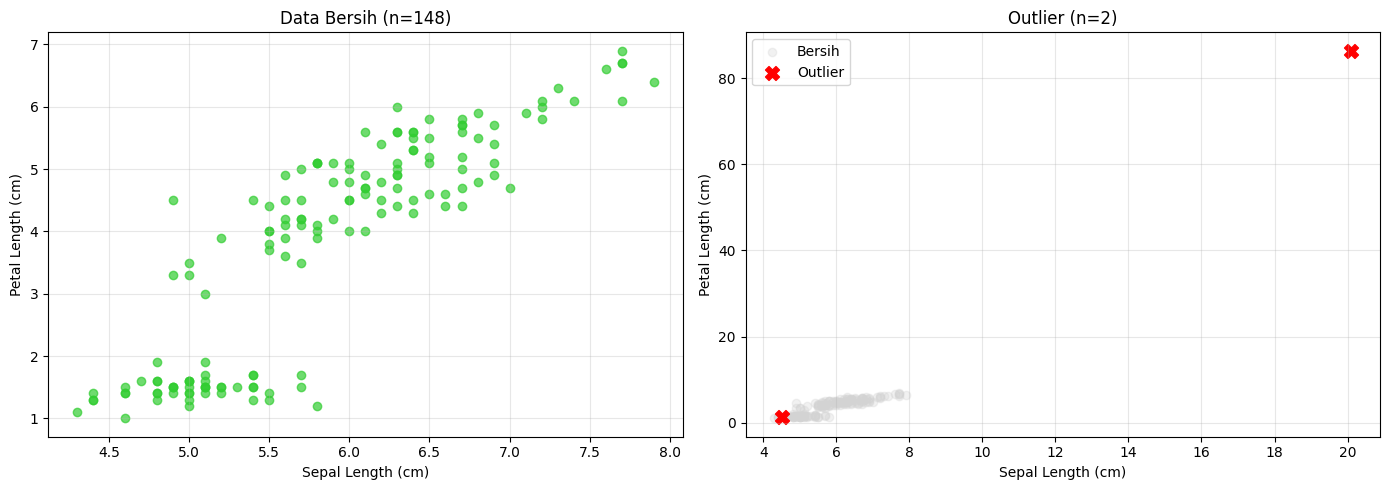

In [48]:
plt.figure(figsize=(14,5))

# Plot Data Bersih
plt.subplot(1,2,1)
plt.scatter(df_clean['sepal length'], df_clean['petal length'], 
            c='limegreen', alpha=0.7, label='Bersih')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Data Bersih (n={})'.format(len(df_clean)))
plt.grid(alpha=0.3)

# Plot Outlier
plt.subplot(1,2,2)
plt.scatter(df_clean['sepal length'], df_clean['petal length'], 
            c='lightgrey', alpha=0.3, label='Bersih')
plt.scatter(outliers['sepal length'], outliers['petal length'], 
            c='red', s=100, marker='X', label='Outlier')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Outlier (n={})'.format(len(outliers)))
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig("data/tugas2/assets/KNN-Cleaned", dpi=300)
plt.show()